In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Jose Nicolas Rodriguez Montoya
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2(n+1))}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

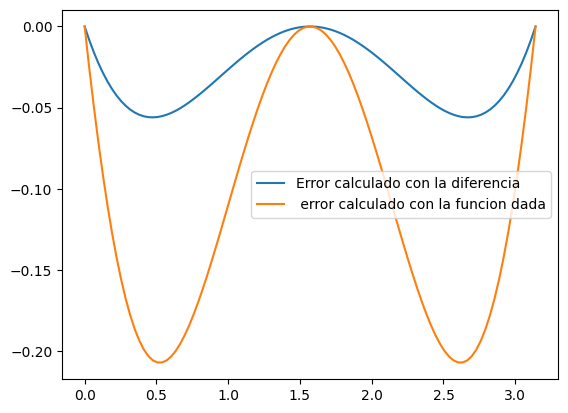

In [ ]:

x_datos = np.array([0, np.pi/2, np.pi]) # valores que queremos interpolar
from math import factorial
x = sp.Symbol('x')
f = sp.sin(x)
y = np.sin(x_datos)
fprime_n = sp.diff(f, x, len(x_datos))
f3_l =sp.lambdify([x], fprime_n)

error = lambda x: (1 / factorial(len(x_datos))) * f3_l(x) * (x - x_datos[0]) * (x - x_datos[1]) * (x - x_datos[2]) #diferencia dada por la funcion error

lagrange_pol = lagrange(x_datos, y) #Calculamos el polinomio de lagrange

x_interp =np.linspace(min(x_datos), max(x_datos), 100) #creamos un intervalo donde evaluar nuestras funciones

error_cal = lambda x: np.sin(x) - lagrange_pol(x) # Esta es la diferencia calculada en bruto

plt.plot(x_interp, error_cal(x_interp), label = 'Error calculado con la diferencia')
plt.plot(x_interp, error(x_interp), label = ' error calculado con la funcion dada')
plt.legend()




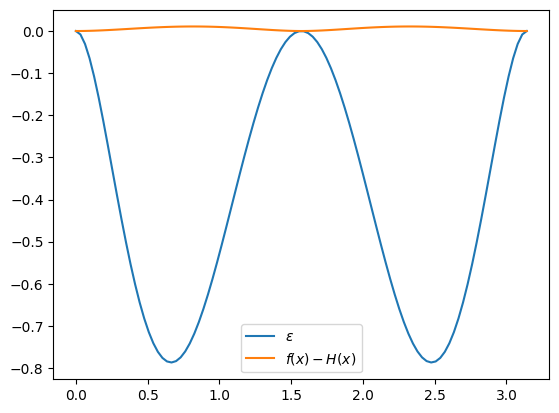

In [ ]:
#Para hermite
f_n = lambda t :-np.sin(t)

f_prime = np.cos(x_datos)

error_hermite = lambda x: (1 / factorial(2*(len(x_datos)-1)-2)) * f_n(np.pi/4) * (x - x_datos[0])**2 * (x - x_datos[1])**2 * (x - x_datos[2])**2

#hermite_pol =
from scipy.interpolate import CubicHermiteSpline
pol_hermite = CubicHermiteSpline (x_datos, y, dydx = f_prime)
plt.plot(x_interp, error_hermite(x_interp), label = '$\epsilon$')
plt.plot(x_interp, np.sin(x_interp) - pol_hermite(x_interp) , label = '$f(x) - H(x)$')
plt.legend()


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

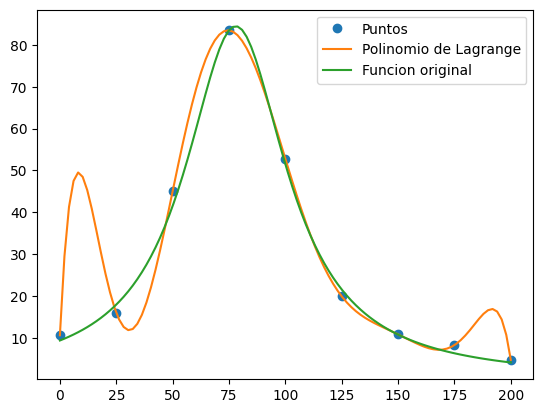

In [ ]:
#traemos los datos dados
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

#definimos los valores esperados de gamma y Er
Er, gamma = 78, 55

#Funcion dad
BW = lambda sigma0, E, Er, gamma: sigma0 / ((E-Er)**2 + (gamma**2)/4)

#primero encontremos el valor de sigma0

#definimos la funcion (asumiendo que nos piden encontrar sigma 0 entonces debemos despejarlo)
BW_sigma0 = lambda sigma, E, Er, gamma: sigma * ((E-Er)**2 + (gamma**2)/4)

sigma0 = BW_sigma0(sigma_exp[3], Energia[3], Er, gamma) #Usamos dos puntos elegidos para un valor estimado de sigmma0

poly_l = lagrange(Energia, sigma_exp)
x_interp = np.linspace(min(Energia), max(Energia), 100)
plt.plot(Energia, sigma_exp, 'o', label = 'Puntos')
plt.plot(x_interp, poly_l(x_interp), label = 'Polinomio de Lagrange')
plt.plot(x_interp, BW(sigma0, x_interp, Er, gamma), label = 'Funcion original')
plt.legend()
plt.show()


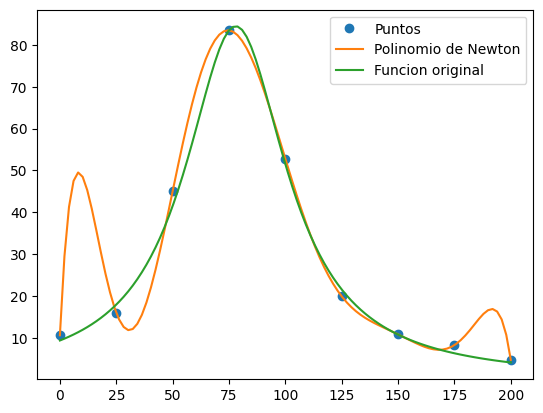

In [ ]:
# Para interpolarlo con newton tomare el codigo compartido en el GitHub
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P

poly_N  = Polinomio_Newton(Energia, sigma_exp)

plt.plot(Energia, sigma_exp, 'o', label = 'Puntos')
plt.plot(x_interp, poly_N(x_interp), label = 'Polinomio de Newton')
plt.plot(x_interp, BW(sigma0, x_interp, Er, gamma), label = 'Funcion original')
plt.legend()
plt.show()



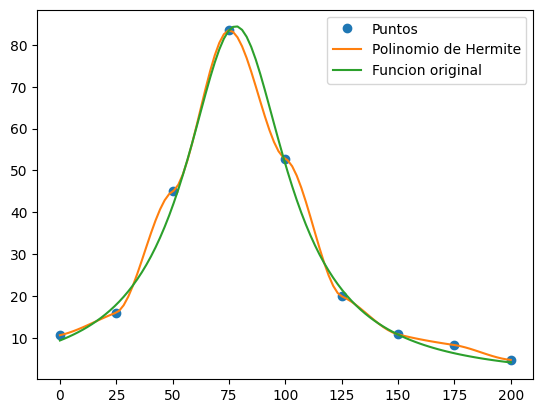

la funcion que mejor aproxima con un error de 6.754081108174866, es el polinomio de Hermite


In [ ]:
# con hermite splain
sigma_prime = lambda sigma0, E, Er, gamma: -32*sigma0*(E-Er)/(4*((E-Er)**2 + (gamma**2)))**2
hermite = CubicHermiteSpline(Energia, sigma_exp, dydx = sigma_prime(sigma0, Energia, Er, gamma))
plt.plot(Energia, sigma_exp, 'o', label = 'Puntos')
plt.plot(x_interp, hermite(x_interp), label = 'Polinomio de Hermite')
plt.plot(x_interp, BW(sigma0, x_interp, Er, gamma), label = 'Funcion original')
plt.legend()
plt.show()

# Calculamos las diferencias
error_lagrange = np.max(np.abs(BW(sigma0, x_interp, Er, gamma) - poly_l(x_interp)))
error_newton = np.max(np.abs(BW(sigma0, x_interp, Er, gamma) - poly_N(x_interp)))
error_hermite = np.max(np.abs(BW(sigma0, x_interp, Er, gamma)- hermite(x_interp)))


print(f'la funcion que mejor aproxima con un error de {min(error_lagrange, error_newton, error_hermite)}, es el polinomio de Hermite')


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

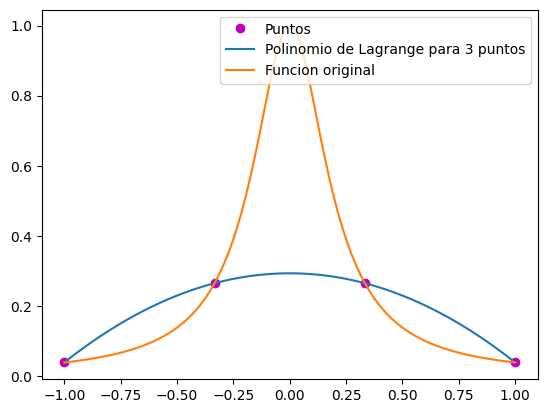

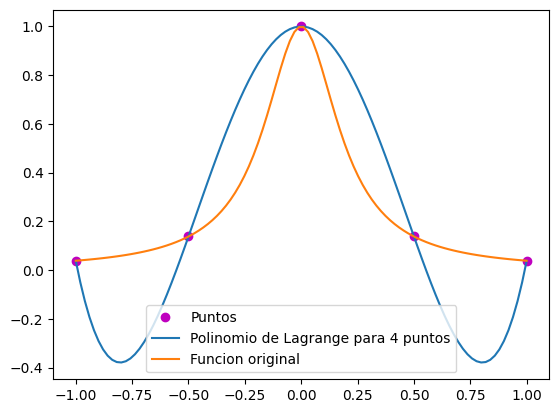

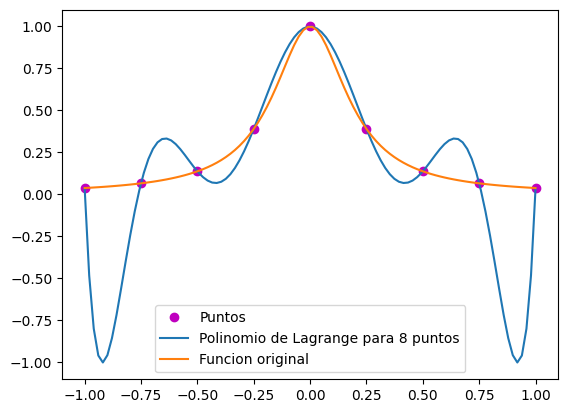

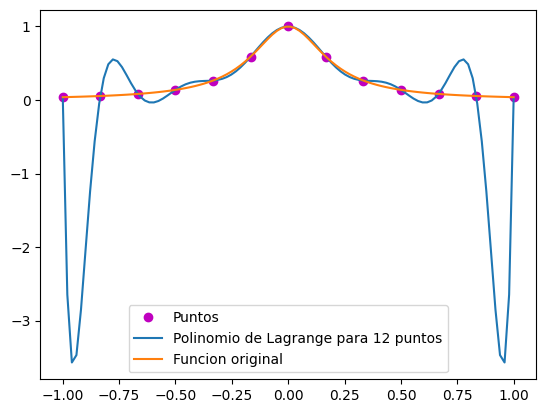

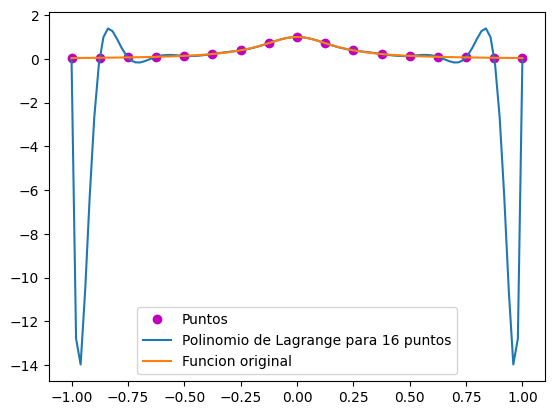

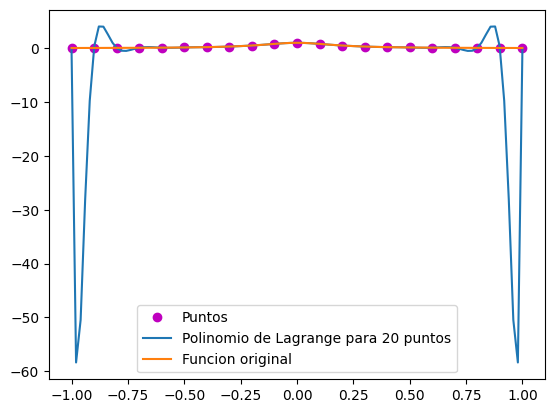

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [ ]:
f = lambda x: 1/(1 + 25*(x**2)) #Definimos la función

n = [3, 4, 8, 12, 16, 20]   #Creamos una lista con los valores a probar


points = lambda t : np.linspace(-1 , 1 , t + 1) #Funcion que nos retorna un linspace equiespaciado con n+1 elementos

for N, i in enumerate(n):

  x = points(n[N])
  y = f(x)        # Creamos nuestro par de puntos.

  poly = lagrange(x, y)
  # Evaluamos

  x_interp = np.linspace(min(x), max(x), 100)
  X = np.linspace(-1, 1, 100)
  plt.plot(x, f(x), 'mo', label = 'Puntos')
  plt.plot(x_interp, poly(x_interp), label = f'Polinomio de Lagrange para {i} puntos'  )
  plt.plot(X, f(X), label = 'Funcion original')
  plt.legend()
  plt.show()

np.linspace(-1, 1, 4)

In [ ]:
x_sym = sp.symbols('x') # Creamos una variable simbolica
fsym = 1 / (1 + 25*(x_sym**2))
f_prime_5 = sp.diff(fsym, x_sym, 5) #Derivamos la funcion, como nos dicen que con n fijo, entonces calculamos para n=4

f_prime_5

error = (1/sp.factorial(4+1))*f_prime_5*(x_sym - (-1))*(x_sym - (-0.33333333))*(x_sym - 0.33333333) * (x_sym - 1)

error_func = sp.lambdify(x_sym, error)

error_func(0.5)

points(4)
x = points(4)
y = f(x)
poly = lagrange(x, y)

error_real = f(0.5) - poly(0.5)

print(f' error calculado con la funcion de error {error_func(0.5)} \ y el error real es {error_real}')

 error calculado con la funcion de error 0.6465505401505044 \ y el error real es -5.551115123125783e-17


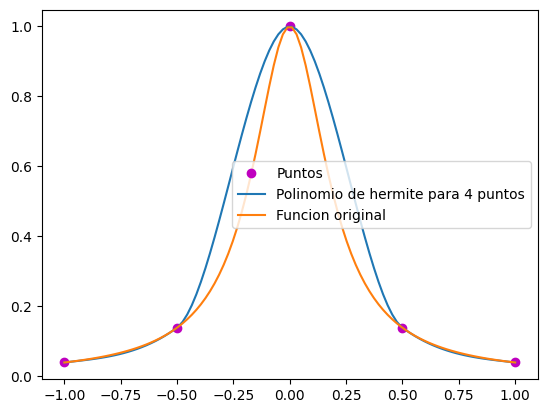

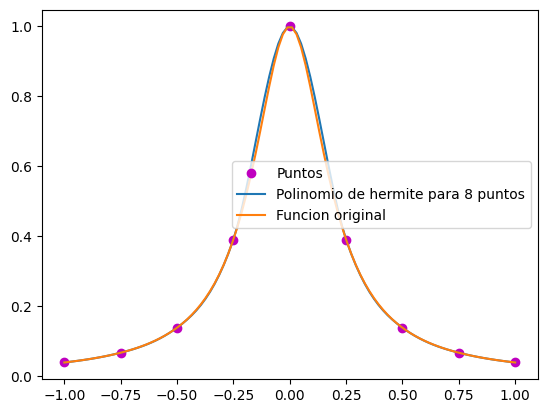

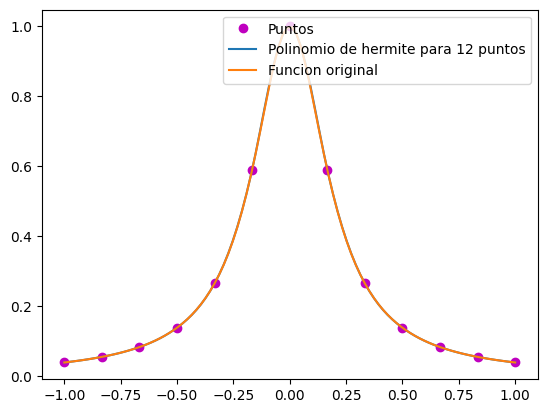

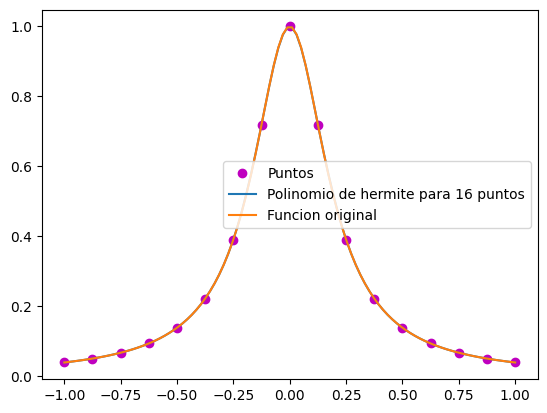

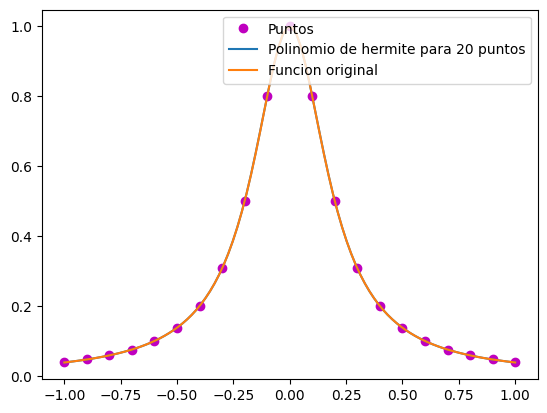

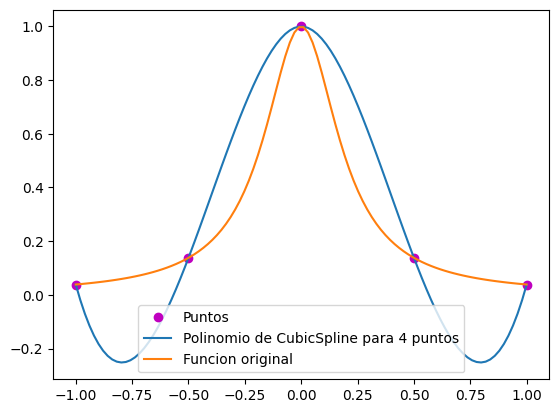

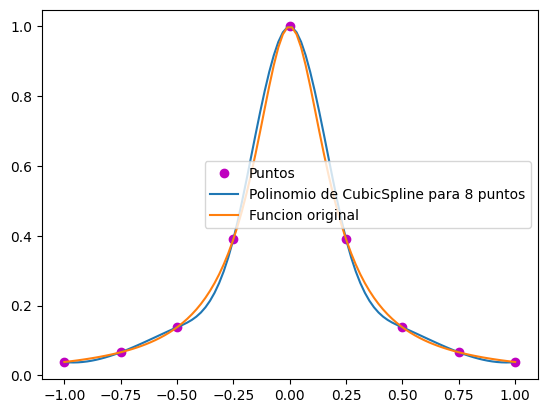

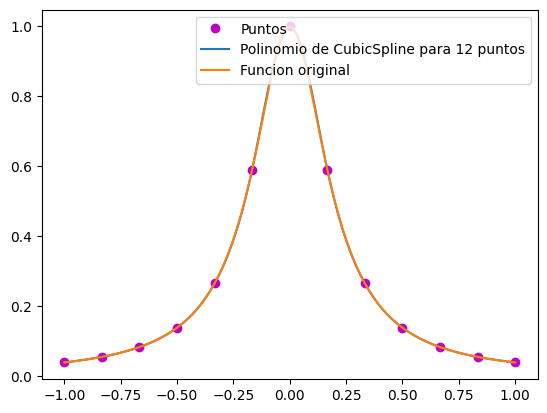

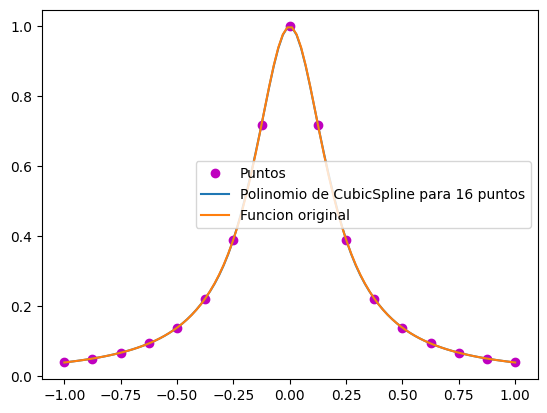

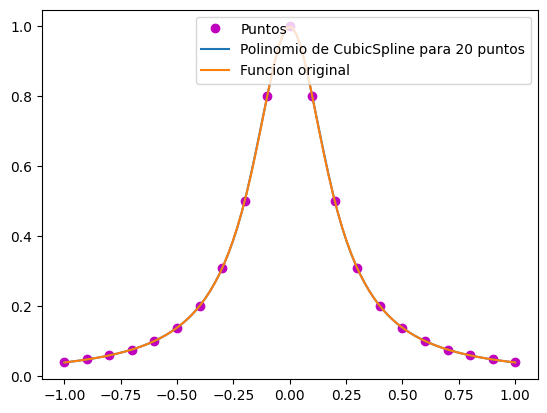

In [ ]:
#repetimos lo primero que hicimos, esta vez para el polinomio de hermite
f = lambda x: 1/(1 + 25*(x**2)) #Definimos la

fprime = lambda x: -50*x/(1+25*(x**2))**2

n = [ 4, 8, 12, 16, 20]   #Creamos una lista con los valores a probar

from scipy.interpolate import CubicHermiteSpline
points = lambda t : np.linspace(-1 , 1 , t + 1) #Funcion que nos retorna un linspace equiespaciado con n+1 elementos

for N, i in enumerate(n):   #Hacemos lo mismo con el metodo de hermite

  x = points(n[N])
  y = f(x)        # Creamos nuestro par de puntos.

  poly_H = CubicHermiteSpline(x, y, fprime(x))
  # Evaluamos

  x_interp = np.linspace(min(x), max(x), 100)
  X = np.linspace(-1, 1, 100)
  plt.plot(x, f(x), 'mo', label = 'Puntos')
  plt.plot(x_interp, poly_H(x_interp), label = f'Polinomio de hermite para {i} puntos'  )
  plt.plot(X, f(X), label = 'Funcion original')
  plt.legend()
  plt.show()


for N, i in enumerate(n):

  x = points(n[N])
  y = f(x)        # Creamos nuestro par de puntos.

  poly_C = CubicSpline(x, y)
  # Evaluamos

  x_interp = np.linspace(min(x), max(x), 100)
  X = np.linspace(-1, 1, 100)
  plt.plot(x, f(x), 'mo', label = 'Puntos')
  plt.plot(x_interp, poly_C(x_interp), label = f'Polinomio de CubicSpline para {i} puntos'  )
  plt.plot(X, f(X), label = 'Funcion original')
  plt.legend()
  plt.show()



# Parece que el metodo Hermite es más preciso para pocos puntos y se comporta similarmente al metodo de CubicSpline para muchos puntos

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

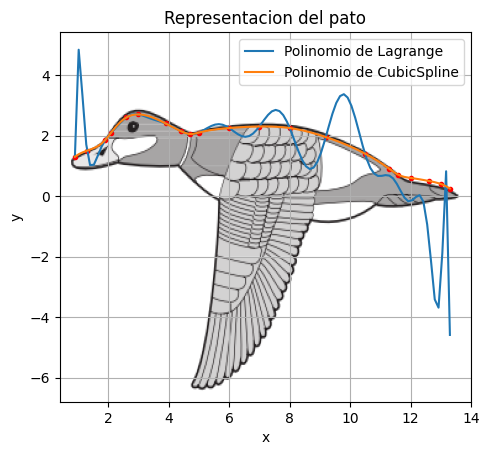

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

poly_L = lagrange(xp, yp)
x_interp = np.linspace(min(xp), max(xp), 100)
plt.plot(x_interp, poly_L(x_interp), label = 'Polinomio de Lagrange')
plt.legend()

poly_c = CubicSpline(xp, yp)
plt.plot(x_interp, poly_c(x_interp), label = 'Polinomio de CubicSpline')
plt.legend()




# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

El valor de la funcion en 1.5 es 3.4375


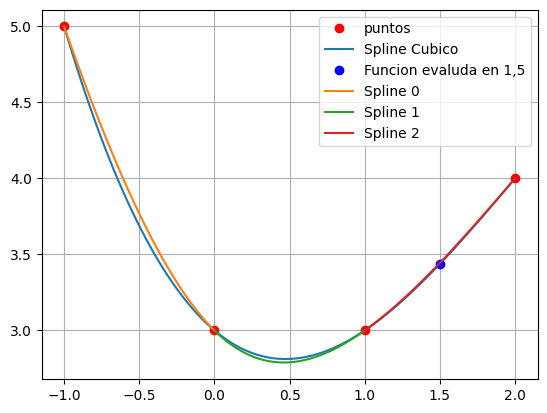

In [ ]:
# Intento N esimo
from scipy.linalg import solve

A = np.array([[1,0,0,0,0,0,0,0,0,0,0,0],
              [1,1,1,1,0,0,0,0,0,0,0,0],
              [0,0,0,0,1,1,1,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,1,1,1],
              [1,1,1,1,-1,0,0,0,0,0,0,0],
              [0,1,2,3,0,-1,0,0,0,0,0,0],
              [0,0,2,6,0,0,-2,0,0,0,0,0],
              [0,0,0,0,1,1,1,1,-1,0,0,0],
              [0,0,2,-6,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,2,6],
              [0,0,0,0,0,1,2,3,0,-1,0,0],
              [0,0,0,0,0,0,2,6,0,0,-2,0]])   #Calculamos los coeficientes a fuerza bruta

b = np.array([5,3,3,4,0,0,0,0,0,0,0,0]) #Valores de la matriz extendida o solucion de cada ecuación

sol = solve(A,b)

a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2 = sol  #Guardamos los parametros


x = sp.symbols('x')

s0 = a0 + b0*(x - (-1)) + c0*(x - (-1))**2 + d0*(x - (-1))**3  #Creamos las funciones de los splines
s1 = a1 + b1*(x - 0) + c1*(x - 0)**2 + d1*(x - 0)**3
s2 = a2 + b2*(x - 1) + c2*(x - 1)**2 + d2*(x - 1)**3

xp = np.array([-1, 0, 1, 2]) #Puntos dados por el problema
yp = np.array([5, 3, 3, 4])

s0 = sp.lambdify(x, s0) #Volvemos funciones lambda cada funcion simbolica
s1 = sp.lambdify(x, s1)
s2 = sp.lambdify(x, s2)

x_0 = np.linspace(xp[0], xp[1], 100) #Definimos los intervalos a los que va cada spline
x_1 = np.linspace(xp[1], xp[2], 100)
x_2 = np.linspace(xp[2], xp[3], 100)

plt.plot(xp, yp, 'ro', label = 'puntos')
pol = CubicSpline(xp, yp)

x_interp = np.linspace(min(xp), max(xp), 1000)
plt.plot(x_interp, pol(x_interp), label = 'Spline Cubico')
plt.plot(1.5, pol(1.5), 'bo', label = 'Funcion evaluda en 1,5')
plt.plot(x_0, s0(x_0), label = 'Spline 0')
plt.plot(x_1, s1(x_1), label = 'Spline 1')
plt.plot(x_2, s2(x_2), label = 'Spline 2')
plt.grid()
plt.legend()

print(f'El valor de la funcion en 1.5 es {pol(1.5)}')